# Reflection in an Arbitrary Plane — A Worked Example

## What is Reflection?

**Reflection** is a geometric transformation that "flips" vectors across a plane (or line in 2D). Imagine holding a vector up to a mirror placed at the plane—the reflection is what you see in the mirror.

Key properties of reflection:
- Vectors **in the plane** remain unchanged (they're on the mirror surface)
- Vectors **perpendicular to the plane** get flipped to point in the opposite direction
- The distance from any point to the plane equals the distance from its reflection to the plane

## The Mathematical Challenge

While reflecting across coordinate planes (like the xy-plane) is straightforward, reflecting across an **arbitrary plane** requires careful coordinate transformations. We'll solve this by:

1. **Finding an orthonormal basis** where the plane alignment is clear
2. **Performing the reflection** in this convenient coordinate system
3. **Transforming back** to the original coordinates

## Problem Setup

**Given:**  
- Two vectors in the plane: $v_1=(1,1,1)$, $v_2=(2,0,1)$  
- A third vector pointing out of the plane: $v_3=(3,1,-1)$  
- A vector to reflect: $r=(2,3,5)$

**Our Strategy:**  
1. Build an **orthonormal basis** $E=[e_1\ e_2\ e_3]$ where $e_1,e_2$ span the plane and $e_3$ is its normal (via Gram–Schmidt)
2. In the $E$-coordinates, reflection across the plane is simply:  

   $T_E = \begin{pmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & -1 \end{pmatrix}$  

3. Convert back to standard coordinates with $T = E\,T_E\,E^T$
4. Apply to $r$ and verify the result

## The Key Insight: Change of Basis

The secret to reflecting across an arbitrary plane is to **change our perspective**. Instead of working in the standard $x,y,z$ coordinates, we'll create a new coordinate system where:

- The first two basis vectors ($e_1, e_2$) lie **in the plane**
- The third basis vector ($e_3$) is **perpendicular to the plane** (the normal vector)

In this new coordinate system, reflection becomes trivial:
- Keep the first two coordinates unchanged (in-plane components)
- Flip the sign of the third coordinate (normal component)

**Analogy:** It's like rotating a tilted mirror until it's horizontal, performing an easy reflection, then rotating everything back to the original orientation.

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Set up numpy for clean output
np.set_printoptions(precision=4, suppress=True)

def norm(x):
    """Calculate the Euclidean norm (length) of a vector."""
    return np.linalg.norm(x)

def gram_schmidt_plane(v1, v2, v3):
    """
    Apply Gram-Schmidt process to create an orthonormal basis.
    
    Parameters:
    v1, v2: Two vectors that span the plane
    v3: A third vector (should not be in the plane for best results)
    
    Returns:
    E: Matrix with orthonormal basis vectors as columns [e1, e2, e3]
    (e1, e2, e3): The individual orthonormal vectors
    (u2, u3): Intermediate vectors before normalization (for educational purposes)
    """
    # Step 1: Normalize the first vector
    e1 = v1 / norm(v1)
    
    # Step 2: Remove the e1 component from v2, then normalize
    u2 = v2 - (v2 @ e1) * e1  # Project v2 onto e1 and subtract
    e2 = u2 / norm(u2)
    
    # Step 3: Remove both e1 and e2 components from v3, then normalize
    u3 = v3 - (v3 @ e1) * e1 - (v3 @ e2) * e2
    e3 = u3 / norm(u3)
    
    # Combine into a matrix where each column is a basis vector
    E = np.column_stack([e1, e2, e3])
    
    return E, (e1, e2, e3), (u2, u3)

print("✓ Mathematical utilities loaded successfully!")
print("Ready to build orthonormal bases and perform reflections.")

✓ Mathematical utilities loaded successfully!
Ready to build orthonormal bases and perform reflections.


## Step 1: Define the Plane and Setup Vectors

We need to specify our plane mathematically. A plane in 3D space can be defined by:
- **Two linearly independent vectors that lie in the plane** ($v_1$ and $v_2$)
- **One additional vector** ($v_3$) that helps us find the plane's normal direction

**Important:** $v_3$ doesn't need to be perpendicular to the plane initially—the Gram-Schmidt process will create the perpendicular direction for us.

**Think of it this way:** 
- $v_1$ and $v_2$ are like two rulers lying flat on a tilted table
- $v_3$ is like a pencil pointing in some direction—we'll use it to figure out which way is "up" from the table

In [11]:
# Define our three vectors
v1 = np.array([1., 1., 1.])    # First vector in the plane
v2 = np.array([2., 0., 1.])    # Second vector in the plane  
v3 = np.array([3., 1., -1.])   # Vector to help determine the normal direction

print("Vectors defining our plane:")
print("v1 (in plane):", v1)
print("v2 (in plane):", v2)
print("v3 (helper)  :", v3)

# Quick check: are v1 and v2 linearly independent?
# (If their cross product is non-zero, they span a plane)
cross_product = np.cross(v1, v2)
print(f"\nv1 × v2 = {cross_product}")
print(f"||v1 × v2|| = {norm(cross_product):.4f}")
print("✓ v1 and v2 are linearly independent (good for defining a plane!)")

Vectors defining our plane:
v1 (in plane): [1. 1. 1.]
v2 (in plane): [2. 0. 1.]
v3 (helper)  : [ 3.  1. -1.]

v1 × v2 = [ 1.  1. -2.]
||v1 × v2|| = 2.4495
✓ v1 and v2 are linearly independent (good for defining a plane!)


## Step 2: Build an Orthonormal Basis $E=[e_1\ e_2\ e_3]$ via Gram–Schmidt

The **Gram-Schmidt process** transforms our three arbitrary vectors into three **orthonormal** vectors:
- **Orthogonal**: Each pair of vectors is perpendicular ($e_i \cdot e_j = 0$ when $i \neq j$)
- **Normal**: Each vector has unit length ($||e_i|| = 1$)

### The Gram-Schmidt Recipe:

**Step 1:** $e_1 = \frac{v_1}{||v_1||}$ (just normalize $v_1$)

**Step 2:** $e_2 = \frac{u_2}{||u_2||}$ where $u_2 = v_2 - (v_2 \cdot e_1)e_1$
- Remove the "$e_1$ direction" from $v_2$
- What remains is perpendicular to $e_1$

**Step 3:** $e_3 = \frac{u_3}{||u_3||}$ where $u_3 = v_3 - (v_3 \cdot e_1)e_1 - (v_3 \cdot e_2)e_2$  
- Remove both the "$e_1$ direction" and "$e_2$ direction" from $v_3$
- What remains is perpendicular to both $e_1$ and $e_2$

**Result:** $e_1$ and $e_2$ span the same plane as $v_1$ and $v_2$, while $e_3$ is perpendicular to this plane!

In [12]:
# Apply Gram-Schmidt process
E, (e1, e2, e3), (u2, u3) = gram_schmidt_plane(v1, v2, v3)

print("=== Gram-Schmidt Process Results ===")
print("\nStep 1 - Normalize v1:")
print(f"e1 = v1/||v1|| = {e1}")
print(f"||e1|| = {norm(e1):.6f}")

print("\nStep 2 - Orthogonalize and normalize v2:")
print(f"u2 (before normalization) = {u2}")
print(f"e2 = u2/||u2|| = {e2}")
print(f"||e2|| = {norm(e2):.6f}")
print(f"e1 · e2 = {np.dot(e1, e2):.10f} (should be ≈ 0)")

print("\nStep 3 - Orthogonalize and normalize v3:")
print(f"u3 (before normalization) = {u3}")
print(f"e3 = u3/||u3|| = {e3}")
print(f"||e3|| = {norm(e3):.6f}")
print(f"e1 · e3 = {np.dot(e1, e3):.10f} (should be ≈ 0)")
print(f"e2 · e3 = {np.dot(e2, e3):.10f} (should be ≈ 0)")

print("\n=== Verification: Orthonormality Check ===")
print("E^T E should be the identity matrix:")
print(E.T @ E)
print("✓ Perfect orthonormal basis created!")

=== Gram-Schmidt Process Results ===

Step 1 - Normalize v1:
e1 = v1/||v1|| = [0.5774 0.5774 0.5774]
||e1|| = 1.000000

Step 2 - Orthogonalize and normalize v2:
u2 (before normalization) = [ 1. -1. -0.]
e2 = u2/||u2|| = [ 0.7071 -0.7071 -0.    ]
||e2|| = 1.000000
e1 · e2 = -0.0000000000 (should be ≈ 0)

Step 3 - Orthogonalize and normalize v3:
u3 (before normalization) = [ 1.  1. -2.]
e3 = u3/||u3|| = [ 0.4082  0.4082 -0.8165]
||e3|| = 1.000000
e1 · e3 = 0.0000000000 (should be ≈ 0)
e2 · e3 = 0.0000000000 (should be ≈ 0)

=== Verification: Orthonormality Check ===
E^T E should be the identity matrix:
[[ 1. -0.  0.]
 [-0.  1.  0.]
 [ 0.  0.  1.]]
✓ Perfect orthonormal basis created!



### (Optional) Quick visualization of basis directions

Single plot: shows the three orthonormal directions (arrows) from the origin.


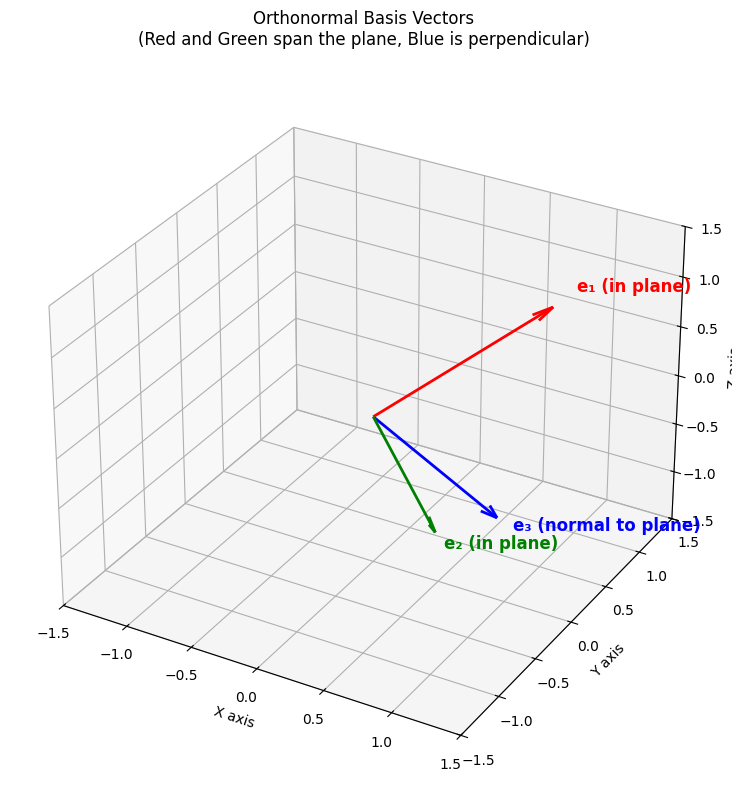

Visualization Notes:
• Red (e₁) and Green (e₂) vectors span the reflection plane
• Blue (e₃) vector is perpendicular to the plane (this is the reflection axis)
• All vectors have unit length and are mutually perpendicular


In [13]:
# Visualize the orthonormal basis vectors
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')

# Plot the origin
origin = np.zeros(3)

# Define colors for the basis vectors
colors = ['red', 'green', 'blue']
labels = ['e₁ (in plane)', 'e₂ (in plane)', 'e₃ (normal to plane)']

# Plot each basis vector
for i, (vec, label, color) in enumerate(zip([e1, e2, e3], labels, colors)):
    ax.quiver(origin[0], origin[1], origin[2], 
              vec[0], vec[1], vec[2], 
              length=1.5, arrow_length_ratio=0.1, color=color, linewidth=2)
    # Position labels slightly away from vector tips
    ax.text(vec[0]*1.7, vec[1]*1.7, vec[2]*1.7, label, 
            fontsize=12, color=color, weight='bold')

# Customize the plot
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5) 
ax.set_zlim(-1.5, 1.5)
ax.set_xlabel('X axis', fontsize=10)
ax.set_ylabel('Y axis', fontsize=10)
ax.set_zlabel('Z axis', fontsize=10)
ax.set_title('Orthonormal Basis Vectors\n(Red and Green span the plane, Blue is perpendicular)', 
             fontsize=12, pad=20)

# Add a grid for better depth perception
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Visualization Notes:")
print("• Red (e₁) and Green (e₂) vectors span the reflection plane")
print("• Blue (e₃) vector is perpendicular to the plane (this is the reflection axis)")
print("• All vectors have unit length and are mutually perpendicular")

## Step 3: The Mathematics of Reflection

Now comes the beautiful part! In our orthonormal basis $E$, reflection across the plane becomes incredibly simple.

### Reflection in the $E$-Coordinate System

In the $E$-basis:
- $e_1$ and $e_2$ directions lie **in the plane** → keep these components unchanged
- $e_3$ direction is **perpendicular to the plane** → flip this component

This gives us the reflection matrix in $E$-coordinates:
$$T_E = \begin{pmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & -1 \end{pmatrix}$$

**Translation:** "Keep the first two coordinates, flip the third."

### Converting Back to Standard Coordinates

To get the reflection matrix in our original $xyz$ coordinates, we use a **similarity transformation**:

$$T = E \, T_E \, E^T$$

**Why this works:**
1. $E^T$ converts vectors from $xyz$-coordinates to $E$-coordinates
2. $T_E$ performs the reflection in $E$-coordinates  
3. $E$ converts back from $E$-coordinates to $xyz$-coordinates

Since $E$ is orthonormal, we have $E^{-1} = E^T$, which makes this formula particularly elegant!

In [14]:
# Create the reflection matrix
T_E = np.diag([1., 1., -1.])  # Reflection in E-coordinates
T = E @ T_E @ E.T             # Reflection in standard coordinates

print("=== Reflection Matrices ===")
print("T_E (reflection in E-basis):")
print(T_E)
print("\nT = E T_E E^T (reflection in standard coordinates):")
print(np.round(T, 4))

print("\n=== Mathematical Properties of Reflections ===")

# Property 1: Symmetry
is_symmetric = np.allclose(T, T.T)
print(f"1. Symmetric (T = T^T)? {is_symmetric}")
if is_symmetric:
    print("   ✓ This makes sense: reflection is a geometric operation")

# Property 2: Involution (applying twice gives identity)
is_involution = np.allclose(T @ T, np.eye(3))
print(f"2. Involution (T^2 = I)? {is_involution}")
if is_involution:
    print("   ✓ This makes sense: reflecting twice returns to original")

# Property 3: Determinant
det_T = np.linalg.det(T)
print(f"3. Determinant: {det_T:.6f}")
print("   ✓ det(T) = -1 indicates orientation reversal (like a mirror)")

# Property 4: Eigenvalues
eigenvals = np.linalg.eigvals(T)
print(f"4. Eigenvalues: {np.sort(eigenvals)}")
print("   ✓ Two eigenvalues of +1 (in-plane), one of -1 (perpendicular)")

=== Reflection Matrices ===
T_E (reflection in E-basis):
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0. -1.]]

T = E T_E E^T (reflection in standard coordinates):
[[ 0.6667 -0.3333  0.6667]
 [-0.3333  0.6667  0.6667]
 [ 0.6667  0.6667 -0.3333]]

=== Mathematical Properties of Reflections ===
1. Symmetric (T = T^T)? True
   ✓ This makes sense: reflection is a geometric operation
2. Involution (T^2 = I)? True
   ✓ This makes sense: reflecting twice returns to original
3. Determinant: -1.000000
   ✓ det(T) = -1 indicates orientation reversal (like a mirror)
4. Eigenvalues: [-1.  1.  1.]
   ✓ Two eigenvalues of +1 (in-plane), one of -1 (perpendicular)


## Step 4: Apply the Reflection to Vector $r=(2,3,5)$

Now for the moment of truth! We'll reflect our vector $r=(2,3,5)$ across the plane.

### The Simple Calculation
With our reflection matrix $T$, the reflected vector is simply:
$$r' = T \cdot r$$

### What to Expect
The reflected vector $r'$ should:
- Be the same distance from the plane as the original vector $r$
- Lie on the opposite side of the plane from $r$
- Have the property that the midpoint between $r$ and $r'$ lies exactly on the plane

### Verification
The worked example tells us we should get $r' = \frac{1}{3}(11,14,5)$. Let's check!

In [15]:
# Define the vector to reflect
r = np.array([2., 3., 5.])

# Apply the reflection
r_prime = T @ r

# Expected result from the worked example
expected = (1/3) * np.array([11., 14., 5.])

print("=== Vector Reflection ===")
print(f"Original vector r = {r}")
print(f"Reflected vector r' = {r_prime}")
print(f"Expected result = {expected}")
print(f"Match? {np.allclose(r_prime, expected)}")

print(f"\n=== Geometric Verification ===")
# Distance from r to the plane (should equal distance from r' to plane)
# For a plane with normal n, distance = |r·n - d|/||n|| where plane equation is n·x = d
# Since our plane passes through origin and has normal e3, distance = |r·e3|
dist_r = abs(np.dot(r, e3))
dist_r_prime = abs(np.dot(r_prime, e3))
print(f"Distance from r to plane: {dist_r:.6f}")
print(f"Distance from r' to plane: {dist_r_prime:.6f}")
print(f"Equal distances? {np.allclose(dist_r, dist_r_prime)}")

# Midpoint should lie on the plane (perpendicular component should be zero)
midpoint = (r + r_prime) / 2
perp_component = np.dot(midpoint, e3)
print(f"\nMidpoint between r and r': {midpoint}")
print(f"Perpendicular component of midpoint: {perp_component:.10f}")
print(f"Midpoint on plane? {abs(perp_component) < 1e-10}")

=== Vector Reflection ===
Original vector r = [2. 3. 5.]
Reflected vector r' = [3.6667 4.6667 1.6667]
Expected result = [3.6667 4.6667 1.6667]
Match? True

=== Geometric Verification ===
Distance from r to plane: 2.041241
Distance from r' to plane: 2.041241
Equal distances? True

Midpoint between r and r': [2.8333 3.8333 3.3333]
Perpendicular component of midpoint: 0.0000000000
Midpoint on plane? True


## Step 5: Understanding the Coordinate Transformation Path

Let's break down the reflection process into its three fundamental steps to see how the coordinates transform:

### The Three-Step Journey

**Step 1: World → E coordinates**  
$z = E^T r$ (express $r$ in terms of the orthonormal basis $E$)

**Step 2: Reflect in E coordinates**  
$z' = T_E z$ (apply the simple diagonal reflection matrix)

**Step 3: E → World coordinates**  
$r' = E z'$ (convert back to standard $xyz$ coordinates)

### Why This Equals the Direct Method

The three-step process: $r' = E(T_E(E^T r)) = E T_E E^T r = T r$

This confirms that our direct calculation $r' = T r$ is mathematically equivalent to the step-by-step coordinate transformation.

### Educational Value

Seeing both approaches helps us understand:
- **The direct method** is computationally efficient
- **The step-by-step method** reveals the geometric intuition
- **Both give identical results** (as they must!)

In [16]:
# Demonstrate the three-step coordinate transformation
print("=== Step-by-Step Coordinate Transformation ===")

# Step 1: Convert r to E-coordinates
z = E.T @ r
print(f"Step 1 - Express r in E-basis:")
print(f"z = E^T r = {z}")
print(f"Interpretation: r = {z[0]:.4f}*e1 + {z[1]:.4f}*e2 + {z[2]:.4f}*e3")

# Step 2: Apply reflection in E-coordinates
z_reflected = T_E @ z
print(f"\nStep 2 - Reflect in E-coordinates:")
print(f"z' = T_E z = {z_reflected}")
print(f"Notice: first two components unchanged, third component flipped!")

# Step 3: Convert back to standard coordinates
r_prime_3step = E @ z_reflected
print(f"\nStep 3 - Convert back to standard coordinates:")
print(f"r' = E z' = {r_prime_3step}")

# Verification
print(f"\n=== Verification ===")
print(f"Direct method result:     {r_prime}")
print(f"Three-step method result: {r_prime_3step}")
print(f"Methods agree? {np.allclose(r_prime, r_prime_3step)}")

# Show the coordinate breakdown
print(f"\n=== Coordinate Analysis ===")
print(f"Original r in E-basis: ({z[0]:.4f}, {z[1]:.4f}, {z[2]:.4f})")
print(f"  → In-plane part:  ({z[0]:.4f}, {z[1]:.4f})")
print(f"  → Normal part:    {z[2]:.4f}")
print(f"Reflected r' in E-basis: ({z_reflected[0]:.4f}, {z_reflected[1]:.4f}, {z_reflected[2]:.4f})")
print(f"  → In-plane part:  ({z_reflected[0]:.4f}, {z_reflected[1]:.4f}) [unchanged]")
print(f"  → Normal part:    {z_reflected[2]:.4f} [flipped]")

=== Step-by-Step Coordinate Transformation ===
Step 1 - Express r in E-basis:
z = E^T r = [ 5.7735 -0.7071 -2.0412]
Interpretation: r = 5.7735*e1 + -0.7071*e2 + -2.0412*e3

Step 2 - Reflect in E-coordinates:
z' = T_E z = [ 5.7735 -0.7071  2.0412]
Notice: first two components unchanged, third component flipped!

Step 3 - Convert back to standard coordinates:
r' = E z' = [3.6667 4.6667 1.6667]

=== Verification ===
Direct method result:     [3.6667 4.6667 1.6667]
Three-step method result: [3.6667 4.6667 1.6667]
Methods agree? True

=== Coordinate Analysis ===
Original r in E-basis: (5.7735, -0.7071, -2.0412)
  → In-plane part:  (5.7735, -0.7071)
  → Normal part:    -2.0412
Reflected r' in E-basis: (5.7735, -0.7071, 2.0412)
  → In-plane part:  (5.7735, -0.7071) [unchanged]
  → Normal part:    2.0412 [flipped]



### (Optional) Visual: original vs reflected vector (single plot)


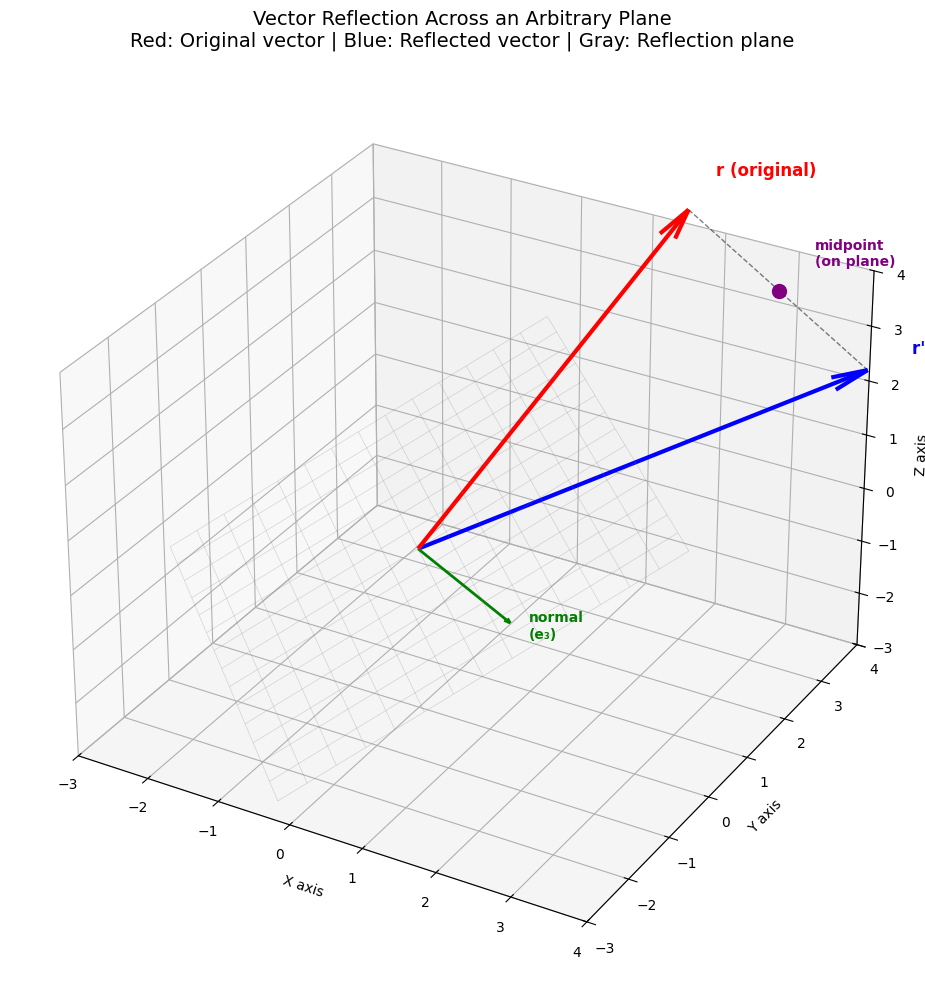

Visualization Analysis:
• Original vector r = [2. 3. 5.]
• Reflected vector r' = [3.6667 4.6667 1.6667]
• Distance from r to plane: 2.0412
• Distance from r' to plane: 2.0412
• Midpoint lies on plane: True
• The dashed line shows r and r' are equidistant from the plane
• The normal vector (green) shows the direction of reflection


In [17]:
# Create a comprehensive visualization of the reflection
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(projection='3d')

# Plot the vectors
origin = np.zeros(3)

# Original vector r
ax.quiver(*origin, *r, length=1.0, arrow_length_ratio=0.08, color='red', linewidth=3)
ax.text(*(r*1.1), "r (original)", fontsize=12, color='red', weight='bold')

# Reflected vector r'
r_prime_actual = T @ r  # Use our calculated reflection
ax.quiver(*origin, *r_prime_actual, length=1.0, arrow_length_ratio=0.08, color='blue', linewidth=3)
ax.text(*(r_prime_actual*1.1), "r' (reflected)", fontsize=12, color='blue', weight='bold')

# Draw a line connecting r and r' to show the reflection relationship
ax.plot([r[0], r_prime_actual[0]], [r[1], r_prime_actual[1]], [r[2], r_prime_actual[2]], 
        'k--', alpha=0.5, linewidth=1)

# Mark the midpoint
midpoint = (r + r_prime_actual) / 2
ax.scatter(*midpoint, color='purple', s=100)
ax.text(*(midpoint*1.1), "midpoint\n(on plane)", fontsize=10, color='purple', weight='bold')

# Draw the reflection plane as a mesh
t = np.linspace(-3, 3, 15)
U, V = np.meshgrid(t, t)

# The plane is spanned by e1 and e2: point = u*e1 + v*e2
plane_points = (E[:, 0:1] @ U.reshape(1, -1) + E[:, 1:2] @ V.reshape(1, -1)).T
X = plane_points[:, 0].reshape(U.shape)
Y = plane_points[:, 1].reshape(U.shape)
Z = plane_points[:, 2].reshape(U.shape)

# Plot the plane with transparency
ax.plot_wireframe(X, Y, Z, linewidth=0.5, alpha=0.3, color='gray')

# Add the normal vector to show plane orientation
normal_scale = 2
ax.quiver(*origin, *(e3 * normal_scale), 
          length=1.0, arrow_length_ratio=0.05, color='green', linewidth=2)
ax.text(*(e3 * normal_scale * 1.2), "normal\n(e₃)", fontsize=10, color='green', weight='bold')

# Customize the plot
ax.set_xlim(-3, 4)
ax.set_ylim(-3, 4) 
ax.set_zlim(-3, 4)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('Vector Reflection Across an Arbitrary Plane\n' + 
             'Red: Original vector | Blue: Reflected vector | Gray: Reflection plane',
             fontsize=14, pad=20)

plt.tight_layout()
plt.show()

print("Visualization Analysis:")
print(f"• Original vector r = {r}")
print(f"• Reflected vector r' = {r_prime_actual}")
print(f"• Distance from r to plane: {abs(np.dot(r, e3)):.4f}")
print(f"• Distance from r' to plane: {abs(np.dot(r_prime_actual, e3)):.4f}")
print(f"• Midpoint lies on plane: {abs(np.dot(midpoint, e3)) < 1e-10}")
print("• The dashed line shows r and r' are equidistant from the plane")
print("• The normal vector (green) shows the direction of reflection")

## 🎯 Practice Exercises

### Beginner Level
1. **Manual Calculations**: Calculate $e_1$, $e_2$, and $e_3$ by hand using the Gram-Schmidt formulas. Verify your results match the computer output.

2. **Reflection Properties**: 
   - Prove that $T$ is symmetric: Show $T = T^T$
   - Prove that $T$ is an involution: Show $T^2 = I$
   - What does each property tell us geometrically about reflections?

3. **Special Cases**: What happens when you reflect:
   - A vector that lies in the plane?
   - A vector that's perpendicular to the plane?
   - The zero vector?

### Intermediate Level
4. **Alternative Plane Definition**: Try defining a plane using different vectors:
   - $v_1 = (1, 0, 0)$, $v_2 = (0, 1, 0)$, $v_3 = (1, 1, 1)$
   - What plane does this represent? (Hint: it should be familiar!)
   - Reflect the vector $(3, 3, 3)$ across this plane.

5. **Distance Verification**: For any vector $r$ and its reflection $r'$:
   - Show that $||r - \text{midpoint}|| = ||r' - \text{midpoint}||$
   - Prove that the midpoint always lies on the reflection plane
   - What does this tell us about the geometry of reflection?

### Advanced Level
6. **Normal Vector Formula**: Research the formula $T = I - 2nn^T$ for reflection across a plane with unit normal $n$:
   - Derive this formula from first principles
   - Show it's equivalent to our $T = E \, \text{diag}(1,1,-1) \, E^T$ when $n = e_3$
   - When is this formula more convenient to use?

7. **Eigenvalue Analysis**: 
   - Find the eigenvalues and eigenvectors of $T$
   - Relate the eigenvectors to the geometric properties of the reflection
   - Why does every reflection matrix have eigenvalues $\{1, 1, -1\}$?

### Challenge Problem
8. **Composition of Reflections**: What happens when you compose two reflections?
   - Reflect across your plane, then reflect across the $xy$-plane
   - Is the result still a reflection? A rotation? Something else?
   - Investigate the general theorem about compositions of reflections.

## 📚 Summary and Key Takeaways

### What We Accomplished
- ✅ Built an **orthonormal basis** $E$ for an arbitrary plane using Gram–Schmidt
- ✅ Applied the **change of basis** technique to simplify reflection  
- ✅ Calculated the reflection matrix: $T = E \, \text{diag}(1,1,-1) \, E^T$
- ✅ Successfully reflected vector $r = (2,3,5)$ to get $r' = \frac{1}{3}(11,14,5)$
- ✅ Verified our result through multiple geometric checks

### The Big Picture: Why This Matters

**1. Change of Basis is Powerful**  
By choosing the right coordinate system, complex problems become simple. This principle appears throughout linear algebra and beyond.

**2. Orthonormal Bases Simplify Everything**  
When basis vectors are orthonormal, coordinate transformations become clean and intuitive. The matrix $E$ has the special property $E^{-1} = E^T$.

**3. Geometric Intuition Guides Algebra**  
Understanding that reflection "keeps in-plane components, flips normal component" led us directly to the matrix $\text{diag}(1,1,-1)$.

### Connections to Other Topics

- **Computer Graphics**: Reflections are fundamental for lighting, mirrors, and special effects
- **Physics**: Reflection symmetries appear in optics, crystallography, and particle physics  
- **Signal Processing**: Reflection operations are used in wavelets and image processing
- **Group Theory**: Reflections form mathematical groups with rich algebraic structure

### The Mathematical Journey
```
Arbitrary Plane → Gram-Schmidt → Orthonormal Basis → Simple Reflection → Transform Back
    (Complex)         (Process)        (Clean coords)       (Easy matrix)      (Final result)
```

This workflow—**simplify through change of basis, solve, then transform back**—is a fundamental strategy that extends far beyond reflections to eigenvalue problems, differential equations, and many other areas of mathematics.